In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import re

from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

  Using cached pip-24.2-py3-none-any.whl.metadata (3.6 kB)
  Using cached setuptools-75.1.0-py3-none-any.whl.metadata (6.9 kB)
Using cached pip-24.2-py3-none-any.whl (1.8 MB)
Using cached setuptools-75.1.0-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 71.0.4
    Uninstalling setuptools-71.0.4:
      Successfully uninstalled setuptools-71.0.4
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.1/29.1 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 71.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's dependency resolver does not currently take into account all the packages that ar

In [ ]:
notes_updated = pd.read_csv('notes_updated_df.csv')
notes_updated

,Unnamed: 0,SUBJECT_ID,HADM_ID,ICD9_CODE,TEXT
0,0,188,123860,51881,Demographics\n Day of mechanical ventilation...
1,1,188,123860,51881,Demographics\n Day of intubation:\n Day of...
2,2,188,123860,51881,Demographics\n Day of intubation:\n Day of...
3,3,188,123860,51881,Demographics\n Day of intubation:\n Day of...
4,4,357,117876,51881,Demographics\n Day of intubation: [**2199-12...
...,...,...,...,...,...
495,495,6884,128932,51881,Demographics\n Day of intubation:\n Day of...
496,496,6884,128932,51881,Demographics\n Day of intubation:\n Day of...
497,497,6884,128932,51881,Demographics\n Day of mechanical ventilation...
498,498,6884,128932,51881,Demographics\n Day of intubation:\n Day of...


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = notes_updated['TEXT']
for s in doc:
  print(s)
  print('****************************************************************************************************************')

Demographics
   Day of mechanical ventilation: 2
   Airway
   Tube Type
   ETT:
                   Position: 24 cm at teeth
                   Route: Oral
                   Type: Standard
                   Size: 8mm
   Cuff  Management:
                   Vol/Press:
                                   Cuff pressure: 25  cmH2O
   Lung sounds
   RLL Lung Sounds: Clear
   RUL Lung Sounds: Clear
   LUL Lung Sounds: Clear
   LLL Lung Sounds: Clear
   Secretions
   Sputum color / consistency: White  / Thin
   Sputum source/amount: Suctioned / Small
   Ventilation Assessment
   Level of breathing assistance: Continuous invasive ventilation
   Visual assessment of breathing pattern: Normal quiet breathing
   Assessment of breathing comfort: No response (sleeping / sedated)
   Invasive ventilation assessment:
   Trigger work assessment: Triggering synchronously
   Plan
   Next 24-48 hours: Continue with daily RSBI tests & SBT's as tolerated;
   Comments: Possible extubation today.
   Reason fo

In [ ]:
note_append = []
for i in range(len(doc)):
  note_append.append(doc[i])
  print(note_append[i])
  print('**********************************************************************************************')


Streaming output truncated to the last 5000 lines.
   Cuff  Management:
                   Vol/Press:
                                   Cuff pressure: 25  cmH2O
                                   Cuff volume: 8  mL /
                   Airway problems:
                   Comments:
   Lung sounds
   RLL Lung Sounds: Diminished
   RUL Lung Sounds: Rhonchi
   LUL Lung Sounds: Rhonchi
   LLL Lung Sounds: Diminished
   Comments:
   Secretions
   Sputum color / consistency: White  / Thin
   Sputum source/amount: Suctioned / Small
   Comments:
   Ventilation Assessment
   Level of breathing assistance:
   Visual assessment of breathing pattern:
   Assessment of breathing comfort:
   Non-invasive ventilation assessment:
   Invasive ventilation assessment:
   Trigger work assessment:
   Dysynchrony assessment:
   Comments:
   Plan
   Next 24-48 hours:
   Reason for continuing current ventilatory support:
   Respiratory Care Shift Procedures
   Transports:
   Destination (R/T)
   Time
   Compli

In [ ]:
corpus = []
for r in range(0, len(note_append)):
  str_tokens = []
  tokens = nlp(note_append[r]).ents
  for r in range(0, len(tokens)):
    str_tokens.append(tokens[r].text)
  corpus.append(list(str_tokens))
print(corpus)


[['2', 'ETT', '24 cm', 'Size', '8', 'Cuff  Management:\n                   Vol/Press', 'Cuff', '25', 'LUL Lung Sounds: Clear', 'LLL Lung Sounds: Clear', 'Sputum', 'Suctioned / Small\n   Ventilation Assessment\n   Level', 'Trigger', 'Plan', '24-48 hours', 'daily', 'SBT', 'today', 'Respiratory Care Shift Procedures', 'ABG'], ['0', 'Ideal', 'Ideal', '0 / 0 / 0', 'Airway', 'Tube Type\n   ETT', '24 cm', 'Size', '8', 'Cuff  Management:\n                   Vol/Press', 'Cuff', '25', 'LUL Lung Sounds:', 'Ventilation Assessment\n   Level', 'Trigger', 'Plan', '24-48 hours', 'daily', 'SBT', 'First Name', 'Titles', '10935**]ess'], ['3', 'Ideal', 'Ideal', '0 / 0 / 0', 'Airway', 'Tube Type\n   ETT', 'Size', '8', 'Cuff  Management:\n                   Vol/Press', 'Cuff', '26', 'Cuff', 'LUL Lung Sounds: Clear', 'LLL Lung Sounds: Clear', 'Sputum', 'Suctioned / None\n   Comments:\n   ', 'Ventilation Assessment\n   Level', 'Trigger', 'Plan', '24-48 hours', 'daily', 'SBT', 'Respiratory Care Shift Procedure

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(corpus, min_count=1)

In [ ]:
model.wv['Ventilation Assessment\n   Level']

array([ 9.42006614e-03,  2.20424786e-01,  4.48523574e-02,  1.31573722e-01,
        9.09825340e-02, -4.08550978e-01,  3.33364040e-01,  5.36310852e-01,
       -2.61813760e-01, -3.22522968e-01, -5.17034009e-02, -3.81902516e-01,
        6.97466806e-02,  7.67366961e-02,  1.51642054e-01, -1.78199664e-01,
        2.71661729e-01, -2.92658687e-01, -9.62997749e-02, -6.97078705e-01,
        1.25382021e-01,  1.39778569e-01,  2.35909343e-01, -1.09834380e-01,
       -1.29157662e-01,  1.19341917e-01, -3.69712114e-01,  1.11541219e-01,
       -1.60603538e-01, -3.63553438e-04,  3.67815226e-01, -4.14323695e-02,
        2.66360879e-01, -3.80445212e-01, -2.14703083e-01,  2.43409559e-01,
        2.20944047e-01, -8.99865106e-02, -1.51079252e-01, -2.26907998e-01,
        3.85620072e-02, -2.94034004e-01, -2.09264960e-02, -8.24112631e-03,
        1.24646693e-01, -9.11074728e-02, -3.19549471e-01, -2.19476625e-01,
        1.07932754e-01,  6.43112659e-02,  3.20507586e-02, -2.73771793e-01,
       -1.08289272e-01, -

In [ ]:
model.wv.similar_by_word('Ventilation Assessment\n   Level')

[('Respiratory Care Shift Procedures\n   ', 0.9994040131568909),
 ('Time', 0.9994036555290222),
 ('24-48 hours', 0.9993787407875061),
 ('daily', 0.9993473887443542),
 ('Trigger', 0.9993176460266113),
 ('SBT', 0.9993144273757935),
 ('Underlying', 0.99930340051651),
 ('Sputum', 0.9992280006408691),
 ('Plan', 0.9991410970687866),
 ('Suctioned / Small\n   Comments', 0.9991200566291809)]

In [ ]:
model.wv.similarity('Ventilation Assessment\n   Level','LLL Lung Sounds')

0.99878526

In [ ]:
# define function to create tSNE plot
def tsne_plot(model, words, preTrained=False):
  "Creates and TSNE model and plots it"
  labels = []
  tokens = []

  for word in words:
    if preTrained:
      tokens.append(model[word])
    else:
      tokens.append(model.wv[word])
      labels.append(word)

    tokens = np.array(tokens)
    tsne_model = TSNE(perplexity=5, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x=[]
    y=[]
    for value in new_values:
      x.append(value[0])
      y.append(value[1])

    plt.figure(figsize=(16,16))
    for i in range(len(x)):
      plt.scatter(x[i], y[i]),
      plt.annotate(labels[i],
                  xy=(x[i], y[i]),
                  xytext = (5,2),
                  textcoords='offset points',
                            ha='right',
                            va='bottom')

      plt.show()

In [ ]:
vocabs = model.wv.key_to_index.keys()
new_v = np.array(list(vocabs))
tsne_plot(model, new_v)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


ValueError: perplexity must be less than n_samples

In [ ]:
## Word2Vec & tsne using Scispacy
!pip install scispacy

  Using cached spacy-3.7.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.6.1-py2.py3-none-any.whl.metadata (8.7 kB)
  Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached thinc-8.2.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
  Using cached blis-0.7.11-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (7.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 83.9 MB/s eta 0:00:00
Using cached numpy-1.26.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
Using cached spacy-3.7.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
Using cached pybind11-2.6.1-py2.py3-none-any.whl (188 kB)
Using cached thinc-8.2.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (922 kB)
Using cached blis-0.7.11-cp310-cp310-manylinux_2_17_x86_64

In [ ]:
# Download/install medically trained NLP packages
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_sm-0.5.4.tar.gz
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_md-0.5.4.tar.gz
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_lg-0.5.4.tar.gz
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_scibert-0.5.4.tar.gz
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_craft_md-0.5.4.tar.gz
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_jnlpba_md-0.5.4.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bc5cdr_md-0.5.4.tar.gz
#!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_ner_bionlp13cg_md-0.5.4.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.8/119.8 MB 26.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_ner_bc5cdr_md: filename=en_ner_bc5cdr_md-0.5.4-py3-none-any.whl size=119787678 sha256=dd4b8e87e6e117a45af814402e1dcf1c5eb19d0e2444df29b78429c0d5ed3772
  Stored in directory: /root/.cache/pip/wheels/56/ff/94/8c86b3e1b0ac75480c6f3179eb33bf970c05d0be9ff2230b77
Successfully built en_ner_bc5cdr_md


In [ ]:
import scispacy
import spacy
nlp = spacy.load("en_ner_bc5cdr_md")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_ner_bc5cdr_md' (0.5.4) was trained with spaCy v3.7.4 and may not be 100% compatible with the current version (3.8.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
/usr/local/lib/python3.10/dist-packages/spacy/language.py:2232: FutureWarning: Possible set union at position 6328
  serializers[name] = lambda proc=proc: proc.to_bytes(exclude=["vocab"])  # type: ignore[misc]


In [ ]:
# Build the corpus of entities extracted from the notes using spacy model
corpus = []
for row in range(0, len(note_append)):
  str_tokens = []
  tokens = nlp(note_append[row]).ents
  for r in range(0, len(tokens)):
    str_tokens.append(tokens[r].text)
  corpus.append(list(str_tokens))
print(corpus)

[['LLL'], ['Rhonchi', 'Rhonchi', 'Rhonchi', 'LLL', 'Rhonchi'], ['cmH2O', 'LLL'], ['LLL'], ['LLL', 'dyspnea'], ['LLL'], ['LLL', 'dyspnea', 'Pt', 'bronchodilators'], ['Pt'], ['cmH2O', 'Wheeze', 'Rhonchi', 'Rhonchi', 'LLL', 'Wheeze'], ['cmH2O', 'Rhonchi', 'Rhonchi', 'LLL', 'PEEP'], ['cmH2O', 'LLL', 'dyspnea'], ['cmH2O', 'LLL', 'NAD'], ['Rhonchi', 'Rhonchi', 'LLL', 'Rhonchi', 'dyspnea'], ['cmH2O', 'LLL'], ['LLL'], ['cmH2O', 'LLL', 'PSV', 'PSV'], ['cmH2O', 'LLL'], ['LLL'], ['LLL'], ['Rhonchi', 'Rhonchi', 'LLL'], ['LLL', 'PS'], ['cmH2O', 'Rhonchi', 'Rhonchi', 'LLL'], ['cmH2O', 'LLL'], ['Rhonchi', 'Rhonchi', 'LLL', 'Pt', 'seizure', 'Seizure disorder', 'status epilepticus', 'cirrhosis', 'DM', 'Hypothyroidism', 'HTN', 'CHF', 'CAD', 'upper GI bleed'], ['cmH2O', 'Wheeze', 'Wheeze', 'Wheeze', 'LLL', 'Wheeze'], [], ['LLL', 'oxygen', 'oxygen'], ['LLL'], ['LLL'], ['cmH2O\n                                   ', 'LLL', 'desaturation', 'NIV'], ['LLL', 'NIV', 'NIV'], ['Wheeze', 'Wheeze', 'LLL', 't/o', 't/

In [ ]:
!pip install gensim

In [ ]:
import gensim

In [ ]:
pd.options.mode.chained_assignment = None
import re
from gensim.models import word2vec
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
model1 = word2vec.Word2Vec(corpus, min_count=1)

In [ ]:
model1.wv['respiratory acidosis']

array([-1.2320010e-03, -2.3001342e-03, -1.7586801e-03, -1.0786726e-03,
       -6.4887609e-03, -3.6536283e-03, -3.0710702e-03,  7.8513259e-03,
        5.7199085e-03, -9.7491505e-04, -4.8195613e-03,  5.1708980e-03,
       -8.8136261e-03,  1.7215108e-03,  4.0568174e-03, -2.0044809e-03,
       -4.4481857e-03, -8.2427487e-03, -8.3757844e-03,  6.9381311e-03,
        3.6636274e-03, -3.3272750e-04,  9.7821662e-03, -8.6238403e-03,
        5.6556705e-04, -4.4308274e-04, -8.1592742e-03, -9.0764416e-03,
        7.1446947e-03, -3.5917885e-03, -7.8001060e-03,  7.9146996e-03,
       -6.2164208e-03, -3.2425271e-03,  1.7147467e-03, -3.2398275e-03,
       -7.9030590e-03, -3.9312397e-03, -9.0132877e-03,  1.3120224e-03,
       -4.5628129e-03, -8.2788567e-05,  2.6445938e-03, -2.3109305e-03,
        8.8313874e-03,  6.9978526e-03, -6.2834332e-04, -6.8461034e-04,
        9.1914047e-04,  6.7731468e-03,  8.9780195e-03, -2.0008972e-03,
       -1.5611830e-03, -3.0144581e-03,  4.9021770e-04, -6.4406502e-03,
      

In [ ]:
model1.wv.similar_by_word('respiratory acidosis')

[('desaturated', 0.24050268530845642),
 ('wheeze', 0.21346957981586456),
 ('bleeding', 0.18701745569705963),
 ('DM', 0.1707112342119217),
 ('hypotention', 0.15455633401870728),
 ('CO2', 0.14201070368289948),
 ('anxiety', 0.1351734697818756),
 ('fiO2', 0.1326470971107483),
 ('ESRD', 0.11322695761919022),
 ('edema', 0.11292155086994171)]

In [ ]:
model1.wv.similarity('respiratory acidosis','LLL')

-0.029353121

In [ ]:
#tsne plot
import numpy as np

def tsne_plot(model,words):
  "Creates and TSNE model and plots it"
  labels = []
  tokens = []

  for word in words:
    tokens.append(model.wv[word])
    labels.append(word)
  else:
    print("Word is not availabe in the model's vocabulary.")

  tsne_model = TSNE(perplexity=5, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
  new_values = tsne_model.fit_transform(np.array(tokens))

  x= []
  y= []
  for value in new_values:
    x.append(value[0])
    y.append(value[1])

  plt.figure(figsize = (10,8))
  for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                 xy=(x[i],y[i]),
                 xytext=(5,2),
                 textcoords='offset points',
                 ha='right',
                 va='bottom')

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78f960616f80>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error
Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x78f960616f80>
Traceback (most recent call last

Word is not availabe in the model's vocabulary.


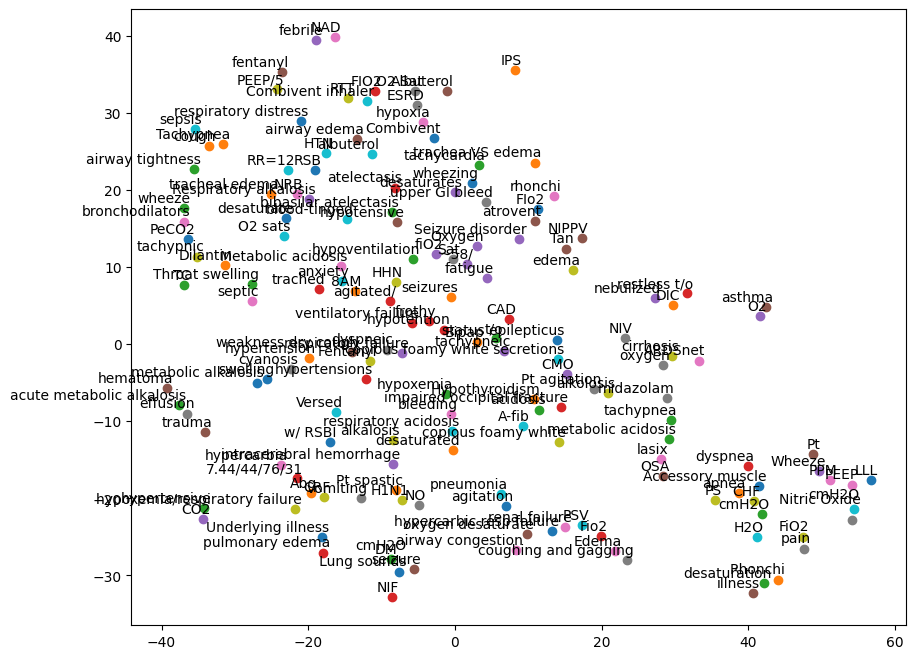

In [ ]:
vocabs = model1.wv.index_to_key
new_v = np.array(list(vocabs))
tsne_plot(model1, new_v)